In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import odr

In [2]:
archivo=pd.ExcelFile("Datos/Efecto_Hall.xlsx")

In [3]:
archivo.sheet_names

['Actividad_2_parte_1',
 'Actividad_2_parte_2',
 'Actividad_3_parte_1',
 'Actividad_3_parte_2',
 'Activi',
 'Clibracion']

In [4]:
calibracion=pd.read_excel(archivo,sheet_name="Clibracion")

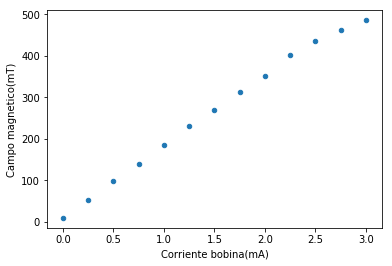

In [5]:
calibracion.plot(kind="scatter",x="Corriente bobina(mA)",y="Campo magnetico(mT)")

In [6]:
def model(x,a,b):
    return a*x+b

In [7]:
x_obs = np.array(calibracion["Corriente bobina(mA)"])
y_obs = np.array(calibracion["Campo magnetico(mT)"])
y_err = np.ones(len(x_obs))*1
x_err = np.ones(len(x_obs))*0.1*0.5

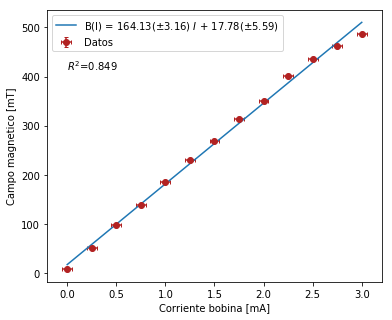

In [8]:
popt, pcov = curve_fit(model, x_obs, y_obs)

x=np.linspace(min(x_obs),max(x_obs))
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

fig=plt.figure(figsize=(6,5))

plt.errorbar(x_obs,y_obs,yerr=y_err,xerr=x_err,capsize=2,fmt="o",color="firebrick",label="Datos")
            #ret += '({}{})'.format(i, '**%d' % num if num > 1 else '')
plt.plot(x,model(x,*popt),label=r"B(I) = {}($\pm${}) $I$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))

plt.text(min(x_obs), 0.85*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlabel("Corriente bobina [mA]")
plt.ylabel("Campo magnetico [mT]")
plt.legend()
plt.savefig("Figuras/Calibracion.png")
plt.show()

# Fit con errores en X y en Y ODR(Orthogonal distance regression)

In [9]:
def model(p,x):
    a,b=p
    return a*x+b

In [10]:
x_obs = np.array(calibracion["Corriente bobina(mA)"])
y_obs = np.array(calibracion["Campo magnetico(mT)"])
y_err = np.ones(len(x_obs))*5
x_err = np.ones(len(x_obs))*0.1*0.5

In [11]:
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[160., 15.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [12]:
print("fit parameter 1-sigma error")
for i in range(len(popt)):
    print(str(popt[i])+"+/- "+str(perr[i]))

fit parameter 1-sigma error
164.62245455893307+/- 2.858615374410804
17.050933858310902+/- 5.051830740650569


In [13]:
#graficar los intervalos de confidencia
nstd = 3.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

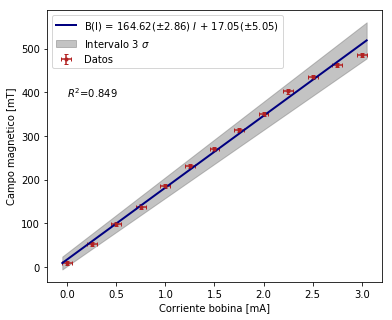

In [14]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel("Corriente bobina [mA]")
plt.ylabel("Campo magnetico [mT]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"B(I) = {}($\pm${}) $I$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.8*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend(loc="best")
plt.savefig("Figuras/Calibracion_error.png")
plt.show()

In [15]:
Act_2_1=pd.read_excel(archivo,sheet_name='Actividad_2_parte_1')

In [16]:
Act_2_1

,Voltaje Alimentacion AC (V),Voltaje Hall (mV),Campo magnetico (mA),Corriente Ip (mA)
0,20,-33.1,1.0,-30
1,20,-30.3,1.0,-28
2,20,-28.2,1.0,-26
3,20,-26.5,1.0,-24
4,20,-23.7,1.0,-22
5,20,21.9,1.0,-20
6,20,-20.9,1.0,-18
7,20,-18.0,1.0,-16
8,20,-15.2,1.0,-14
9,20,-13.6,1.0,-12
